In [1]:
param_window_size = 40
param_seq_length = 288
param_num_epoch = 200
param_lstm_units = 32
param_lstm_stack = 2

In [2]:
import numpy as np
import os
import pandas
import theano

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib inline

Using Theano backend.


In [3]:
dataset_file_path = './Data_RNN/201601.txt'
df = pandas.read_csv(dataset_file_path, delim_whitespace=True, header=None, usecols=[6])

# dataframe to dataset
dataset = df.values
dataset = dataset.astype('float32')
dataset = np.log10(dataset)

# dataset = np.cos(np.arange(288)*(20*np.pi/1000))[:,None]

# normalize
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

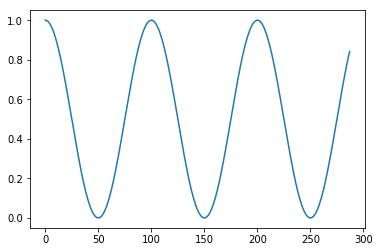

In [4]:
plt.plot(dataset)   
plt.show()

In [5]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        dataX.append(dataset[i:(i+look_back), 0])
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [6]:
# 훈련은 0~10으로 테스트는 11로

look_back = param_window_size

trainX, trainY = create_dataset(dataset, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))

testX, testY = create_dataset(dataset, look_back)
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [1]:
%%time
theano.config.compute_test_value = "ignore"

# create and fit the LSTM network
batch_size = 1
model = Sequential()

for i in range(param_lstm_stack):
    model.add(LSTM(param_lstm_units, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
    model.add(Dropout(0.3))
model.add(LSTM(param_lstm_units, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

NameError: name 'theano' is not defined

In [8]:
for epoch_idx in range(param_num_epoch):
    print ('epochs : ' + str(epoch_idx) )
    model.fit(trainX, trainY, epochs=1, batch_size=1, verbose=2, shuffle=False)
    model.reset_states()

epochs : 0
Epoch 1/1
3s - loss: 0.0455
epochs : 1
Epoch 1/1
3s - loss: 0.0824
epochs : 2
Epoch 1/1
3s - loss: 0.0767
epochs : 3
Epoch 1/1
3s - loss: 0.0504
epochs : 4
Epoch 1/1
3s - loss: 0.1278
epochs : 5
Epoch 1/1
3s - loss: 0.0284
epochs : 6
Epoch 1/1
3s - loss: 0.0174
epochs : 7
Epoch 1/1
3s - loss: 0.0189
epochs : 8
Epoch 1/1
3s - loss: 0.0149
epochs : 9
Epoch 1/1
3s - loss: 0.0143
epochs : 10
Epoch 1/1
3s - loss: 0.0151
epochs : 11
Epoch 1/1
3s - loss: 0.0120
epochs : 12
Epoch 1/1
3s - loss: 0.0106
epochs : 13
Epoch 1/1
3s - loss: 0.0085
epochs : 14
Epoch 1/1
3s - loss: 0.0126
epochs : 15
Epoch 1/1
3s - loss: 0.0087
epochs : 16
Epoch 1/1
3s - loss: 0.0073
epochs : 17
Epoch 1/1
3s - loss: 0.0092
epochs : 18
Epoch 1/1
3s - loss: 0.0115
epochs : 19
Epoch 1/1
3s - loss: 0.0120
epochs : 20
Epoch 1/1
3s - loss: 0.0105
epochs : 21
Epoch 1/1
3s - loss: 0.0082
epochs : 22
Epoch 1/1
3s - loss: 0.0091
epochs : 23
Epoch 1/1
3s - loss: 0.0061
epochs : 24
Epoch 1/1
3s - loss: 0.0077
epochs : 2

In [9]:
testScore = model.evaluate(testX, testY, batch_size=batch_size, verbose=0)
print('Test Score: ', testScore)

model.reset_states()

('Test Score: ', 0.0062197720784854848)


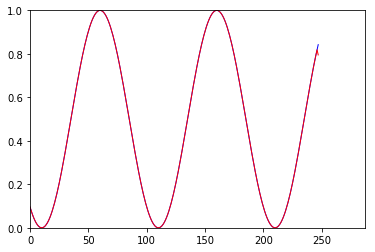

In [10]:
test_seq_size = param_seq_length - param_window_size

for 
for i in range(2):
    lobj = ax.plot([],[],lw=1,color=plotcols[i])[0]
    lines.append(lobj)

def init():
    for line in lines:
        line.set_data([],[])
    return lines

def animate(curr_idx):

    predictions = np.zeros((test_seq_size, 1))
    testPredict = [np.vstack([testX[0][:]])]

    look_hist = curr_idx
    look_ahead = test_seq_size - curr_idx

    for i in range(look_hist):
        prediction = model.predict(np.array([testPredict[-1]]), batch_size=1)
        predictions[i] = testY[i]
        testPredict.append(np.vstack([testX[i+1][:]]))
        
    for i in range(look_ahead):    
        prediction = model.predict(np.array([testPredict[-1]]), batch_size=1)
        predictions[i + look_hist] = prediction
        testPredict.append(np.vstack([testPredict[-1][1:],prediction]))
    
    model.reset_states()
    
    x = np.linspace(0, test_seq_size-1, test_seq_size)
    y = [testY, predictions]
    
    #for index in range(0,1):
    for i, line in enumerate(lines):
        line.set_data(x, y[i]) # set data for each line separately. 

    return lines

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=test_seq_size, interval=20, blit=True)

result_filename = 'w' + str(param_window_size) + '_' + 'u' + str(param_lstm_units) + '_' + 's' + str(param_lstm_stack) + '_' + 'e' + str(param_num_epoch)

anim.save( result_filename + '.gif', writer='imagemagick', fps=30, dpi=100)

plt.show()